# Test a Hilbert transform filter

In [651]:
import numpy as np
from scipy.fftpack import fft, fft2, ifft, ifft2, fftfreq, fftshift
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

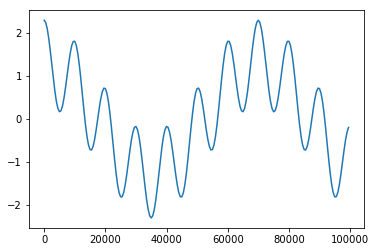

In [652]:
# Create a test signal with positive and negative frequencies

x = np.arange(0,1e5,500)

#lambda_x = [9923.0, -19923.] # Noninteger ratios of dx
lambda_x = [10000.0, -70000.0] # Integer ratios of dx

k1 = 2*np.pi/lambda_x[0]
k2 = 2*np.pi/lambda_x[1]

# Complex amplitude of each signal
A1 = 1.0 + 0*1j
A2 = 1.3 + 0*1j

y = A1*np.exp(1j*k1*x) + A2*np.exp(1j*k2*x) 

plt.plot(x,np.real(y))

/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


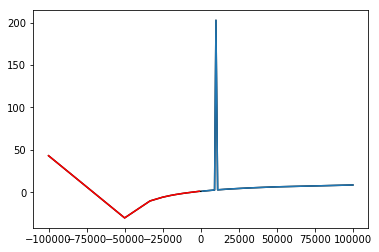

In [653]:
# Compute the fft of the signal

M = x.size
# Window function

#W = np.hanning(M)
W = 1

Y = fft(y*W)

# Compute the frequencies (wavenumbers)
dx = x[1]-x[0]
k = fftfreq(M, dx/(2*np.pi))
dk = 1/(M*dx)
#
plt.plot(2*np.pi/k,Y,'k')
plt.plot(2*np.pi/k[:M//2],Y[:M//2]) # Positve frequencies
plt.plot(2*np.pi/k[M//2::],Y[M//2::],'r') # Negative frequencies

/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.


0.00555555555556


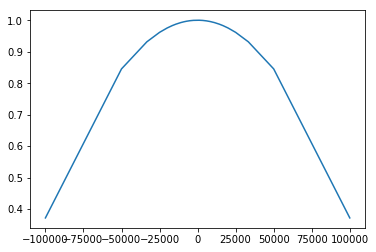

In [654]:
# Design a butterworth filter
cutoff_x = 90000. # Close to the grid size
Wn = dx/cutoff_x
print Wn

b, a = signal.butter(3, Wn, btype='high', analog=False, output='ba')

w, h = signal.freqz(b, a, worN=k*dx)

plt.plot(2*np.pi*dx/w, h)

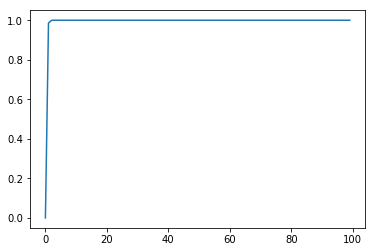

In [655]:
plt.plot(abs(h[0:100]))

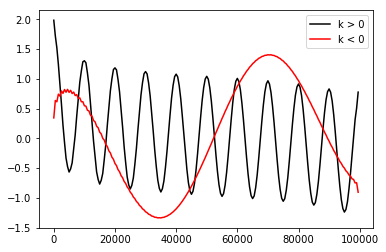

In [656]:
# Filter using the butter worth weights
hpos = fftshift(h)
hpos[k<0] = 0
#hpos[:M//2] = h[:M//2]

ypos = ifft(Y*hpos)

hneg = fftshift(h)
hneg[k>0] = 0

yneg = ifft(Y*hneg)

plt.plot(x, ypos,'k')
plt.plot(x, yneg,'r')
plt.legend(('k > 0','k < 0'))

In [657]:
# Calculate the maximum amplitudes of the positve and negative frequencies
print 'Amplitude of the maximum positive wavenumber', np.max( np.abs(Y*hpos)/M ), np.abs(A1)
print 'Amplitude of the maximum negative wavenumber', np.max( np.abs(Y*hneg)/M ), np.abs(A2)

Amplitude of the maximum positive wavenumber 1.01447359924 1.0
Amplitude of the maximum negative wavenumber 0.941338994888 1.3


((1.4065367636555623-0.062660906433866542j),
 (1.3149327268380206-0.24899487780161389j))

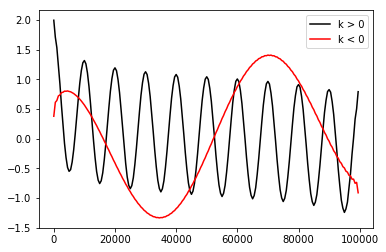

In [658]:
# Filter the positive wavenumbers
Yfiltpos = Y.copy() 
Yfiltpos[k<0] = 0

Yfiltneg = Y.copy() 
Yfiltneg[k>0] = 0

ypos = ifft(Yfiltpos)
yneg = ifft(Yfiltneg)

plt.plot(x, ypos,'k')
plt.plot(x, yneg,'r')
plt.legend(('k > 0','k < 0'))

yneg[10:-10].max(), ypos[10:-10].max()



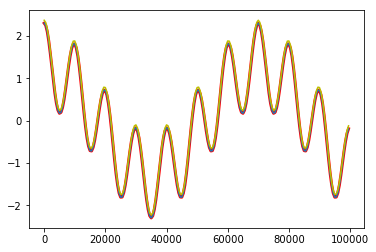

In [659]:
plt.plot(x, ifft(Y),'r',lw=3)
plt.plot(x,y)
plt.plot(x,ypos+yneg,'y')


In [660]:
# Calculate the maximum amplitudes of the positve and negative frequencies
print 'Amplitude of the maximum positive wavenumber', np.max( np.abs(Yfiltpos)/M ), np.abs(A1)
print 'Amplitude of the maximum negative wavenumber', np.max( np.abs(Yfiltneg)/M ), np.abs(A2)

Amplitude of the maximum positive wavenumber 1.01447359924 1.0
Amplitude of the maximum negative wavenumber 0.941338994888 1.3


200 200
Amplitude of the maximum positive wavenumber 1.11682820594 1.0
Amplitude of the maximum negative wavenumber 0.666585916834 1.3


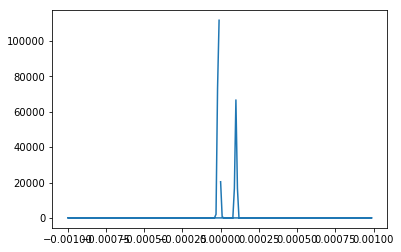

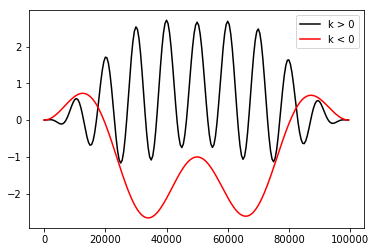

In [661]:
# Play around with Welch's method
print x.size, M

#signal.welch?
next2 = int(2**np.ceil(np.log2(M)))
fs = 1/dx
nperseg = 2*next2
#f, Pxx = signal.welch(y, fs=fs)
f, Pxx = signal.welch(y, fs=fs, nperseg=nperseg, noverlap=next2//4, \
        return_onesided=False)

w = np.hanning(M)
w = w / sum(w)    # normalize analysis window

plt.figure()
plt.plot(f, Pxx)

# Filter the positive wavenumbers
Yfiltpos = Pxx.copy() 
Yfiltpos[f<0] = 0

Yfiltneg = Pxx.copy() 
Yfiltneg[f>0] = 0

ypos = ifft(Yfiltpos)
yneg = ifft(Yfiltneg)

# Calculate the maximum amplitudes of the positve and negative frequencies
print 'Amplitude of the maximum positive wavenumber', np.max( np.abs(Pxx[f<0])/M*fs ), np.abs(A1)
print 'Amplitude of the maximum negative wavenumber', np.max( np.abs(Pxx[f>0])/M*fs ), np.abs(A2)

plt.figure()
plt.plot(x, ypos*w,'k')
plt.plot(x, yneg*w,'r')
plt.legend(('k > 0','k < 0'))

In [662]:
# Test the hilbert transform filter

Hx = signal.hilbert?

In [ ]:
Hx = signal.hilbert

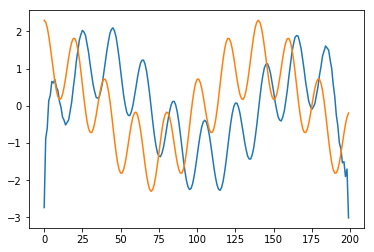

In [663]:
Hx = signal.hilbert(np.real(y))

z = y+1j*Hx

plt.plot(np.imag(Hx))
plt.plot(np.real(Hx))

/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


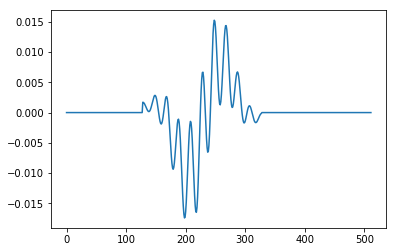

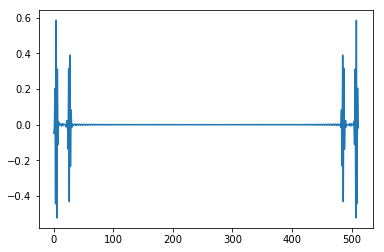

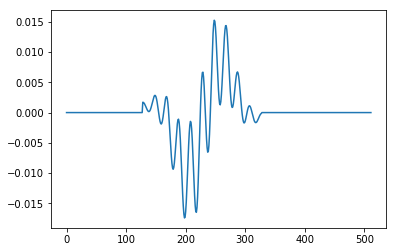

In [677]:
# Zero pad the edges


N = 2*int(2**np.ceil(np.log2(M)))
w = np.hamming(M)
w = w / sum(w)    # normalize analysis window
#w = 1


#hN = (N/2)+1                                            # size of positive spectrum, it includes sample 0
#hM1 = int(np.floor((M+1)/2))                     # half analysis window size by rounding
#hM2 = int(np.floor(M/2))                         # half analysis window size by floor
hM1 = N//4
hM2 = hM1+M
fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
                                      
yw = y*w                                                # window the input sound
fftbuffer[hM1:hM2] = yw                             # zero-pad
    
Y = fft(fftbuffer) 
Ypos = Y.copy()
Ypos[N//2::] = Y[N//2::]

plt.figure()
plt.plot(fftbuffer)

plt.figure()
plt.plot(Y)

plt.figure()
plt.plot(ifft(Ypos))

/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


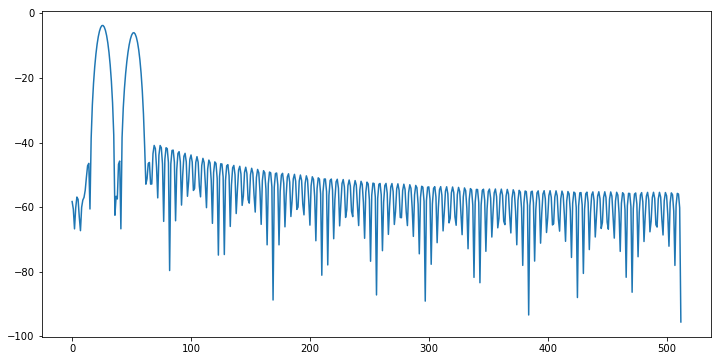

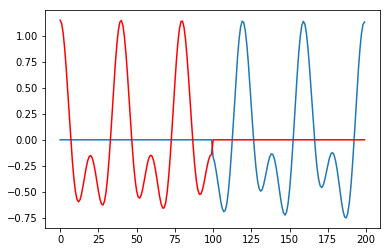

In [542]:
# Try zero buffering
# M = size of time series
# N = size of fft window
N = 4*int(2**np.ceil(np.log2(M)))
w = np.hamming(M)
w = w / sum(w)    # normalize analysis window

hN = (N/2)+1                                            # size of positive spectrum, it includes sample 0
hM1 = int(np.floor((M+1)/2))                     # half analysis window size by rounding
hM2 = int(np.floor(M/2))                         # half analysis window size by floor
fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
                                      
yw = y*w                                                # window the input sound
fftbuffer[:hM1] = yw[hM2:]                              # zero-phase window in fftbuffer
fftbuffer[-hM2:] = yw[:hM2]        
Y = fft(fftbuffer) 

absX = abs(Y[:hN])                                      # compute ansolute value of positive side
absX[absX<np.finfo(float).eps] = np.finfo(float).eps    # if zeros add epsilon to handle log
mX = 20 * np.log10(absX)                                # magnitude spectrum of positive frequencies in dB
tol = 1e-14
Y[:hN].real[np.abs(Y[:hN].real) < tol] = 0.0            # for phase calculation set to 0 the small values
Y[:hN].imag[np.abs(Y[:hN].imag) < tol] = 0.0            # for phase calculation set to 0 the small values         
pX = np.unwrap(np.angle(Y[:hN]))                        # unwrapped phase spectrum of positive frequencies


# Compute the frequencies (wavenumbers)
dx = x[1]-x[0]
k = fftfreq(N, dx/(2*np.pi))
dk = 1/(N*dx)
#
plt.figure(figsize=(12,6))
plt.plot(mX)

# Compute the inverse fft and undo the phase buffer
Ypos = np.zeros(N, dtype=np.complex)
Yneg = np.zeros(N, dtype=np.complex)
Ypos[:hN] = 10**(mX/20) * np.exp(1j*pX)                    # generate positive frequencies
Yneg[hN:] = 10**(mX[-2:0:-1]/20) * np.exp(-1j*pX[-2:0:-1]) # generate negative frequencies

fftbuffer = np.real(ifft(Ypos))                            # compute inverse FFT
ypos = np.zeros(M) 
ypos[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
ypos[hM2:] = fftbuffer[:hM1]

fftbuffer = np.real(ifft(Yneg)) 
yneg = np.zeros(M) 
yneg[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
yneg[hM2:] = fftbuffer[:hM1]


plt.figure()
plt.plot(ypos/w)
plt.plot(yneg/w,'r')
#plt.plot(2*np.pi/k,Y,'k')
#plt.plot(2*np.pi/k[:M//2],Y[:M//2]) # Positve frequencies
#plt.plot(2*np.pi/k[M//2::],Y[M//2::],'r') # Negative frequencies

# Do the same in 2D

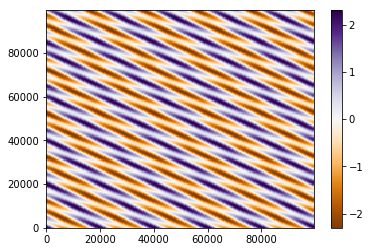

In [643]:
# Create a test signal with positive and negative frequencies

x = np.arange(0,1e5,5e2)
y = np.arange(0,1e5,5e2)

xx, yy = np.meshgrid(x,y)

#lambda_x = [9923.0, -20017.0] # Noninteger ratios of dx
lambda_x = [10000.0, -20000.0] # Integer ratios of dx

lambda_y = [5000.0, -21002.] # Integer ratios of dy

k1 = 2*np.pi/lambda_x[0]
k2 = 2*np.pi/lambda_x[1]

l1 = 2*np.pi/lambda_y[0]
l2 = 2*np.pi/lambda_y[1]

# Complex amplitude of each signal
A1 = 1.0 + 0*1j
A2 = 1.3 + 0*1j

z = A1*np.exp(1j*(k1*xx+l1*yy)) + A2*np.exp(1j*(k2*xx+l2*yy)) 

plt.pcolormesh(x,y,np.real(z), cmap='PuOr')
plt.colorbar()

In [647]:
# Compute the fft
Mx = x.size
My = y.size
Z = fft2(z, axes=(1,0))

# Compute zonal frequencies
dx = x[1]-x[0]
k = fftfreq(Mx, dx/(2*np.pi))
dk = 1/(Mx*dx)

# Compute meridional frequencies
dy = y[1]-y [0]
l = fftfreq(Mx, dx/(2*np.pi))
dl = 1/(My*dy)


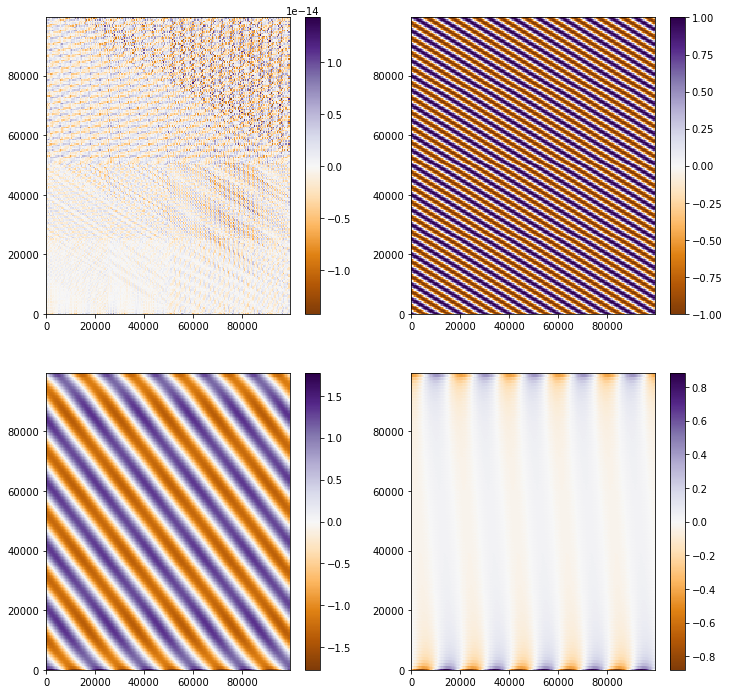

In [648]:
# Create filter matrices for each of the four quadrant
Z_posk_posl = np.zeros_like(Z)
Z_posk_posl[:My//2, :Mx//2] = Z[:My//2, :Mx//2] 

z_posk_posl = ifft2(Z_posk_posl)

Z_posk_negl = np.zeros_like(Z)
Z_posk_negl[My//2::, :Mx//2] = Z[My//2::, :Mx//2] 

z_posk_negl = ifft2(Z_posk_negl)

Z_negk_negl = np.zeros_like(Z)
Z_negk_negl[My//2::, Mx//2::] = Z[My//2::, Mx//2::] 

z_negk_negl = ifft2(Z_negk_negl)

Z_negk_posl = np.zeros_like(Z)
Z_negk_posl[:My//2, Mx//2::] = Z[:My//2, Mx//2::] 

z_negk_posl = ifft2(Z_negk_posl)


plt.figure(figsize=(12,12))
plt.subplot(221)
plt.pcolormesh(x,y,np.real(z_posk_negl), cmap='PuOr')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(x,y,np.real(z_posk_posl), cmap='PuOr')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(x,y,np.real(z_negk_negl), cmap='PuOr')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(x,y,np.real(z_negk_posl), cmap='PuOr')
plt.colorbar()

In [649]:
print 'Amplitude of the maximum positive x and y wavenumber', np.max( np.abs(Z_posk_posl)/(Mx*My))
print 'Amplitude of the maximum negative x and y wavenumber', np.max( np.abs(Z_negk_negl)/(Mx*My) )
print 'Amplitude of the maximum -ve x and  +ve y wavenumber', np.max( np.abs(Z_negk_posl)/(Mx*My) )
print 'Amplitude of the maximum +ve x and  -ve y wavenumber', np.max( np.abs(Z_posk_negl)/(Mx*My) )

Amplitude of the maximum positive x and y wavenumber 1.0
Amplitude of the maximum negative x and y wavenumber 1.18168711416
Amplitude of the maximum -ve x and  +ve y wavenumber 0.0592576177681
Amplitude of the maximum +ve x and  -ve y wavenumber 1.24907484391e-15
